Linear Classification
=

Perceptron
-

Linear

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None     #w0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias #W.T * x^i + W0
                y_predicted = self._activation_function(linear_output)
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def _activation_function(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self._activation_function(linear_output)

In [13]:
X_linear = np.array([[1, 1], [2, 1], [2, 2], [3, 1], [3, 3], [5, 2], [5, 3], [6, 1]])
y_linear = np.array([0, 0, 0, 0, 1, 1, 1, 1])

model_perceptron = Perceptron(learning_rate=0.1, n_iters=100)
model_perceptron.fit(X_linear, y_linear)

predictions_linear = model_perceptron.predict([2,1])

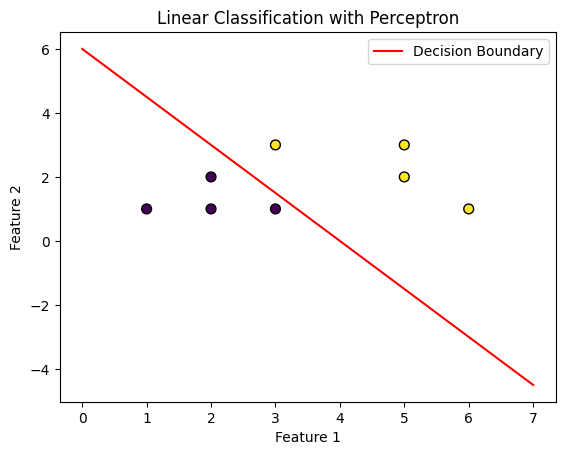

Linear Classification Predictions: 0


In [14]:
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, cmap='viridis', edgecolor='k', s=50)
plt.title('Linear Classification with Perceptron')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
x_line = np.linspace(0, 7, 100)
y_line = -(model_perceptron.weights[0] * x_line + model_perceptron.bias) / model_perceptron.weights[1]
plt.plot(x_line, y_line, color='red', label='Decision Boundary')
plt.legend()
plt.show()

print("Linear Classification Predictions:", predictions_linear)

_______________________________

Multi_Layear_P
=

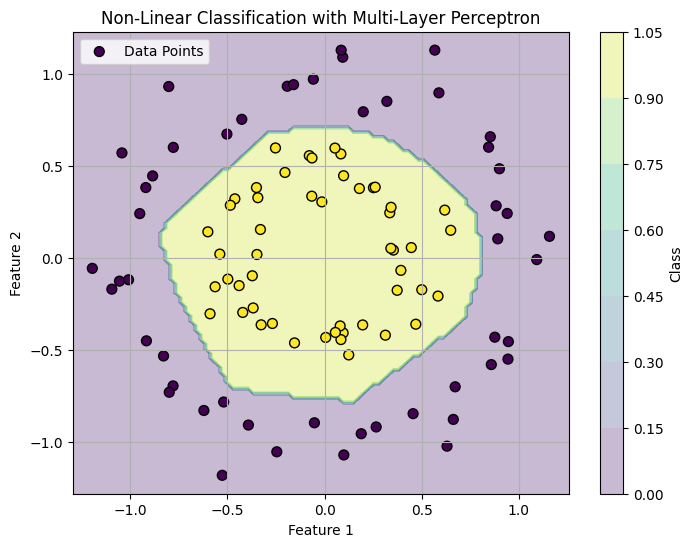

Predictions: [0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1
 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0
 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1]


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier

# 1. تولید داده‌های غیرخطی
X, y = make_circles(n_samples=100, noise=0.1, factor=0.5)

# 2. ایجاد و آموزش مدل MLP با تنظیمات جدید
model = MLPClassifier(hidden_layer_sizes=(7, 7), max_iter=2000, learning_rate_init=0.1, random_state=42)
model.fit(X, y)

# 3. ایجاد یک شبکه از نقاط برای ترسیم مرز تصمیم‌گیری
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# 4. پیش‌بینی کلاس‌ها برای هر نقطه در شبکه
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 5. ترسیم مرز تصمیم‌گیری و داده‌ها
plt.figure(figsize=(8, 6))  # تنظیم اندازه شکل
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')  # ترسیم مرز تصمیم‌گیری
plt.colorbar(label='Class')  # اضافه کردن نوار رنگ
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50, marker='o', label='Data Points')  # ترسیم داده‌ها
plt.title('Non-Linear Classification with Multi-Layer Perceptron')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)  # اضافه کردن شبکه به گراف
plt.show()

# 6. چاپ پیش‌بینی‌ها
predictions = model.predict(X)
print("Predictions:", predictions)